## Scipy_Matplotlib_Assignment

### Assignment 1
##### Fitting and plotting min and max temperature using Scipy

Text(0,0.5,'Min and Max Temp')

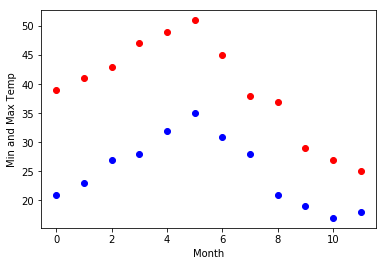

In [1]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

max_temp=np.array([39,41,43,47,49,51,45,38,37,29,27,25])
min_temp=np.array([21,23,27,28,32,35,31,28,21,19,17,18])
months=np.arange(12)

plt.plot(months,max_temp,'ro')
plt.plot(months,min_temp,'bo')
plt.xlabel("Month")
plt.ylabel("Min and Max Temp")



In [21]:
# Importing Scipy and Plotting
from scipy import optimize

# Function Def
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))
res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      min_temp, [-40, 20, 0])

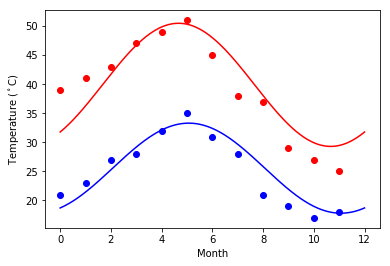

In [22]:
#Plotting

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max_temp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

### Matplotlib Assignment
##### Titanic Data Analysis

##### 1. Pie Chart Representing Male and Female Distribution

In [40]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#Reading Dataset
titanic_df=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [53]:
# Grouping dataset based on Sex
gender_data=titanic_df.groupby(['sex'])['sex'].count()
gender_data

sex
female    466
male      843
Name: sex, dtype: int64

([<matplotlib.patches.Wedge at 0x28098394518>,
 [Text(-0.989341,0.480837,'Female'), Text(0.989341,-0.480837,'Male')],
 [Text(-0.539641,0.262275,'35.6%'), Text(0.539641,-0.262275,'64.4%')])

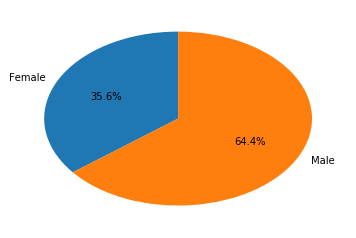

In [116]:
#Plotting Pie Chart
plt.pie(gender_data,labels=['Female','Male'],startangle=90, shadow= False,autopct='%1.1f%%')

#### 2. Scatter Plot Fare paid Vs Age

In [81]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [65]:
# Data preprocessing
#Dropping rows with null fare or age
titanic_filer_df=titanic_df.dropna(subset=['fare','age'])

In [82]:
titanic_filer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1045 non-null float64
survived     1045 non-null float64
name         1045 non-null object
sex          1045 non-null object
age          1045 non-null float64
sibsp        1045 non-null float64
parch        1045 non-null float64
ticket       1045 non-null object
fare         1045 non-null float64
cabin        272 non-null object
embarked     1043 non-null object
boat         417 non-null object
body         119 non-null float64
home.dest    685 non-null object
dtypes: float64(7), object(7)
memory usage: 122.5+ KB


In [115]:
#Reading male and female dataset individually and finding mean fare for an age
titanic_male_df=titanic_filer_df[titanic_filer_df['sex']=='male']
titanic_female_df=titanic_filer_df[titanic_filer_df['sex']=='female']
male_fare_dist=titanic_male_df.groupby('age')['fare'].mean()
female_fare_dist=titanic_female_df.groupby('age')['fare'].mean()


Text(0,0.5,'Fare')

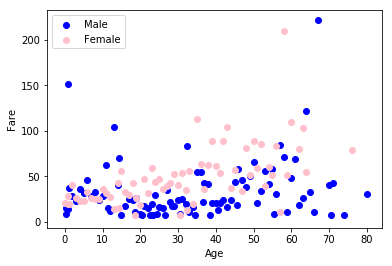

In [114]:
# Plotting Series as a scatter plot
fig, ax=plt.subplots()
ax.scatter(male_fare_dist.index,male_fare_dist,c='blue',label='Male')
ax.scatter(female_fare_dist.index,female_fare_dist,c='pink',label='Female')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Fare')